In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
import deepchem as dc
from tqdm import tqdm

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/home/steshin/miniconda3/envs/lohi_benchmark/lib/python3.10/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [2]:
import sys
sys.path.append('../../code')

from splits import get_nearest_mols

# CYP P450 2D6 Inhibition, Veith et al.

In [3]:
from tdc.single_pred import ADME
data = ADME(name = 'CYP2D6_Veith')
split = data.get_split(method='scaffold')

Found local copy...
Loading...
Done!
100%|██████████| 13130/13130 [00:03<00:00, 3755.95it/s]


In [4]:
train_smiles = split['train']['Drug'].to_list()
test_smiles = split['valid']['Drug'].to_list()

In [5]:
nearest_dist, nearest_idx = get_nearest_mols(test_smiles, train_smiles, return_idx=True)

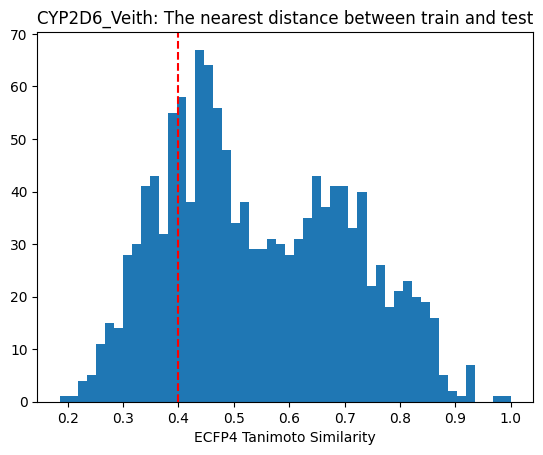

In [6]:
plt.hist(nearest_dist, bins=50)
plt.axvline(x=0.4, color = 'r', ls='--')
plt.title('CYP2D6_Veith: The nearest distance between train and test')
plt.xlabel('ECFP4 Tanimoto Similarity')
plt.savefig('benchmarks_distance_distribution/tdc.png')

In [7]:
(np.array(nearest_dist) > 0.4).mean()

0.7768469154607769

In [8]:
similar_idx = []
for i, sim in enumerate(nearest_dist):
    if sim > 0.99:
        similar_idx.append(i)
similar_idx

[242]

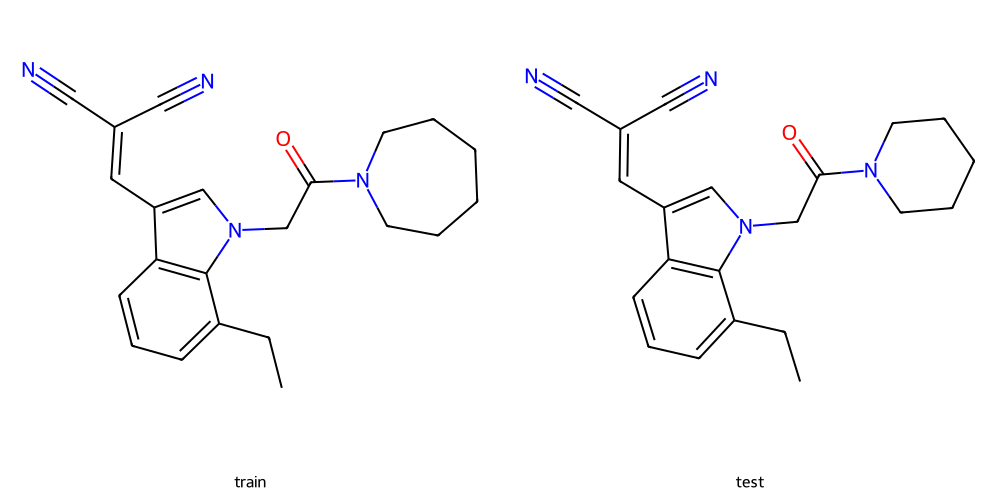

In [9]:
# Looking for the most similar molecules
test_idx = similar_idx[0]
train_idx = nearest_idx[test_idx]

train_similar = train_smiles[train_idx]
test_similar = test_smiles[test_idx]

from rdkit import Chem
from rdkit.Chem import Draw

def draw_molecules(train_smiles, test_smiles):
    # Convert SMILES to RDKit molecule objects
    train_mol = Chem.MolFromSmiles(train_smiles)
    test_mol = Chem.MolFromSmiles(test_smiles)

    # Check if the molecules were created successfully
    if train_mol is None or test_mol is None:
        print("One or both of the provided SMILES strings are invalid.")
        return

    # Create a list of the molecule objects
    mols = [train_mol, test_mol]
    labels = ['train', 'test']

    # Draw the molecules in a 1x2 grid
    img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(500, 500), legends=labels)

    # Display the image
    return img

draw_molecules(train_similar, test_similar)

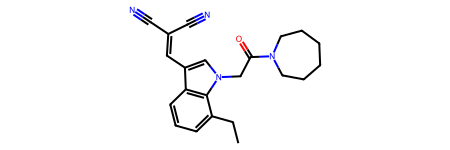

In [10]:
Chem.MolFromSmiles(train_similar)

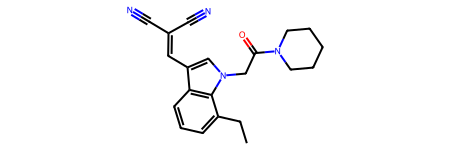

In [11]:
Chem.MolFromSmiles(test_similar)